<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Zahra Soukhtedel
### Student Number : 98105138
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

### Load Dataset:

In [19]:
dataset = pd.read_csv('heart_disease.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


All the features have numerical values, then data is ok without any changes.

### Separate target feaure:

In [21]:
Y = dataset.iloc[:, -1].values
X = dataset.iloc[:,0:-1].values

### Change class labels to 1 and -1:

In [22]:
Y[Y == 0] = -1

### do train test split:

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

### Adaboost Algorithm Implementation (40 points)

In [24]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    A = y - y_pred
    A[A != 0] = 1
    return sum(w * A) / sum(w)

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log((1-error)/error)

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    A = y - y_pred
    A[A != 0] = 1
    return w * np.exp(alpha * A)

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 200):
        
        self.alphas = [] 
        self.training_errors = []
        self.y_preds = []
        self.M = M
        

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                w = np.ones(len(y)) / len(y) 
            else:
                w = update_weights(w, alpha, y, y_pred)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            weak_classifiere_m = DecisionTreeClassifier(max_depth = 1)
            weak_classifiere_m.fit(X, y, sample_weight=w)
            y_pred = weak_classifiere_m.predict(X)
            self.y_preds.append(y_pred)
            self.G_M.append(weak_classifiere_m)

            # 2. Calculate error of this weak classifier and save it to list of trainingterrors
            error_m = calculate_error(y, y_pred, w)
            self.training_errors.append(error_m)


            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            alpha = calculate_alpha(error_m)
            self.alphas.append(alpha)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



#TODO : Fit model
adaBoost = AdaBoost()
adaBoost.fit(x_train, y_train, M=200)

#TODO : Predict on test data
y_test_pred = adaBoost.predict(x_test)


#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
def evaluation_metrics(y_test, y_test_pred):
    accurcy = accuracy_score(y_test, y_test_pred)
    precission = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f_score = f1_score(y_test, y_test_pred)
    print("accurcy : ", accurcy, "\nprecission : ", precission, "\nrecall : ", recall, "\nf_score : ", f_score)

evaluation_metrics(y_test, y_test_pred)
    


accurcy :  0.8790560471976401 
precission :  0.8848484848484849 
recall :  0.8690476190476191 
f_score :  0.8768768768768769


In [26]:
from sklearn.ensemble import AdaBoostClassifier

#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
scikit_adaboost_clf = AdaBoostClassifier(n_estimators=200, random_state=0)
scikit_adaboost_clf.fit(x_train, y_train)
y_pred = scikit_adaboost_clf.predict(x_test)

evaluation_metrics(y_test, y_pred)

accurcy :  0.8967551622418879 
precission :  0.9235668789808917 
recall :  0.8630952380952381 
f_score :  0.8923076923076922


results are slightly same, sklearn resaults are a bit better.

### Early Stopping (15 points)

#### calculate validation error for different number of estimators

In [49]:
#TODO : Calculate validation error for different number of estimators 
def validation_error_scikitlearn(n):
    adaboost_clf = AdaBoostClassifier(n_estimators=n, random_state=0)
    adaboost_clf.fit(x_train, y_train)
    y_pred = adaboost_clf.predict(x_test)
    err = accuracy_score(y_test, y_pred)
    print("n = ", n, " > ", err)
    return err

def validation_error_adaboost(n):
    adaboost_clf = AdaBoost()
    adaboost_clf.fit(x_train, y_train, M=n)
    y_pred = adaboost_clf.predict(x_test)
    err = accuracy_score(y_test, y_pred)
    print("n = ", n, " > ", err)
    return err
    
validation_error_scikitlearn(100)
validation_error_scikitlearn(200)
validation_error_scikitlearn(300)
validation_error_scikitlearn(400)
validation_error_scikitlearn(500)
validation_error_scikitlearn(600)
validation_error_scikitlearn(700)
validation_error_scikitlearn(800)
validation_error_scikitlearn(900)
validation_error_scikitlearn(1000)
validation_error_scikitlearn(1500)
validation_error_scikitlearn(3000)

n =  100  >  0.8731563421828908
n =  200  >  0.8967551622418879
n =  300  >  0.9262536873156342
n =  400  >  0.9410029498525073
n =  500  >  0.9469026548672567
n =  600  >  0.9557522123893806
n =  700  >  0.9557522123893806
n =  800  >  0.9557522123893806
n =  900  >  0.9557522123893806
n =  1000  >  0.9646017699115044
n =  1500  >  0.9646017699115044
n =  3000  >  0.9734513274336283


0.9734513274336283

#### Plot validation error versus number of estimators figure for sklearn model

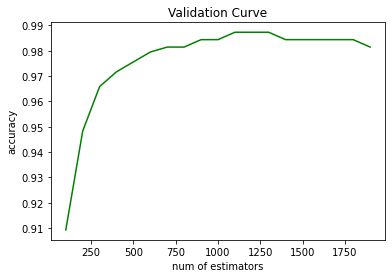

In [50]:
from sklearn.model_selection import validation_curve

#TODO : Plot validation error versus number of estimators figure.
train_score, test_score = validation_curve(AdaBoostClassifier(), X, Y,
                                       param_name = "n_estimators",
                                       param_range = np.arange(100, 2000, 100),
                                       cv = 5,
                                       scoring = "accuracy")

train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis = 1)
test_std = np.std(test_score, axis = 1)

plt.plot(np.arange(100, 2000, 100), test_mean , color = 'g')

plt.title("Validation Curve")
plt.xlabel("num of estimators")
plt.ylabel("accuracy")

plt.show()

#### Plot validation error versus number of estimators figure for our AdaBoost model

n =  100  >  0.8466076696165191
n =  200  >  0.8790560471976401
n =  300  >  0.8938053097345132
n =  400  >  0.9056047197640118
n =  500  >  0.8967551622418879
n =  600  >  0.8967551622418879
n =  700  >  0.9026548672566371
n =  800  >  0.8997050147492626
n =  900  >  0.9085545722713865
n =  1000  >  0.8997050147492626
n =  1100  >  0.8997050147492626
n =  1200  >  0.8997050147492626
n =  1300  >  0.9056047197640118
n =  1400  >  0.9056047197640118
n =  1500  >  0.9203539823008849
n =  1600  >  0.9203539823008849
n =  1700  >  0.9292035398230089
n =  1800  >  0.9351032448377581
n =  1900  >  0.9351032448377581
n =  2000  >  0.9351032448377581


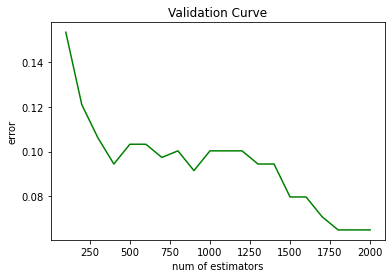

In [51]:
scores = np.zeros(20)
j = 0
for i in range(100, 2100, 100):
    scores[j] = validation_error_adaboost(i)
    j += 1
    

plt.plot(np.arange(100, 2100, 100), 1 - scores, label = "Cross Validation Error", color = 'g')
plt.title("Validation Curve")
plt.xlabel("num of estimators")
plt.ylabel("error")
plt.show()    
    

##### for scikit model :

In [52]:
#TODO : Print the best number for estimators and minimum value for validation error.
print(np.arange(100, 2100, 100)[np.argmin(100 - test_mean)])
print(np.min(1 - test_mean))

1100
0.012682926829268304


##### for adaboost that we had impelemented we have

In [53]:
#TODO : Print the best number for estimators and minimum value for validation error.
print(np.arange(100, 2100, 100)[np.argmin(100 - scores)])
print(np.min(1 - scores))

1800
0.06489675516224191


### Weighted Error (10 points)

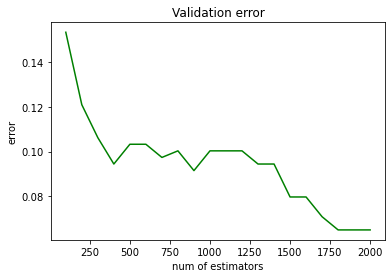

In [57]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
train_errors = np.ones(20)
adaboost = AdaBoost()
j = 0
for i in range(100, 2100, 100):
    w = adaboost.fit(x_train, y_train, M=i)
    y_pred = adaboost.predict(x_test)
    train_errors[j] =np.sum(np.asarray(adaboost.training_errors) * np.asarray(adaboost.alphas))
    j+=1
    
plt.plot(np.arange(100, 2100, 100), 1 - scores, label = "Cross Validation Error", color = 'g')
plt.title("weighted training erro
          
          r")
plt.xlabel("num of estimators")
plt.ylabel("error")
plt.show()    
        



### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

as thr number of estimatores increases, the sum over the values will increas too, but when getting avarage this wont happend.